# EECS16A Homework 12

## Question 3: Mechanical Correlation

### Part (c)

In [1]:
import numpy as np
s1 = [2, -2, 2, -2]
s2 = [1, 2, 3, 4]

# Use the function np.correlate with mode='full' for linear cross correlation.
## your code here
print(np.correlate(s1, s2, 'full'))
print(np.correlate(s2, s1, 'full'))

[ 8 -2  6 -4 -4 -2 -2]
[-2 -2 -4 -4  6 -2  8]


## Question 4: Audio File Matching

This notebook continues the audio file matching problem. Be sure to have song.wav and clip.wav in the same directory as the notebook.

In this notebook, we will look at the problem of searching for a small audio clip inside a song.

The song "Mandelbrot Set" by Jonathan Coulton is licensed under <a href="http://creativecommons.org/licenses/by-nc/3.0/">CC BY-NC 3.0</a>

If you have trouble playing the audio file in IPython, try opening it in a different browser. I encountered problem with Safari but Chrome works for me.

In [ ]:
import numpy as np
import wave
import matplotlib.pyplot as plt
import scipy.io.wavfile
import operator
from IPython.display import Audio
%matplotlib inline

given_file = 'song.wav'
target_file = 'clip.wav'
rate_given,  given_signal  = scipy.io.wavfile.read(given_file)
rate_target, target_signal = scipy.io.wavfile.read(target_file)
given_signal  = given_signal[:2000000].astype(float)
target_signal = target_signal.astype(float)
def play_clip(start, end, signal=given_signal):
    scipy.io.wavfile.write('temp.wav', rate_given, signal[start:end].astype(np.int16))
    return Audio(url='temp.wav', autoplay=True)

def run_comparison(target_signal, given_signal, idxs=None):
    # Run everything if not called with idxs set to something
    if idxs is None:
        idxs = [i for i in range(len(given_signal)-len(target_signal))]
    return idxs, [vector_compare(target_signal, given_signal[i:i+len(target_signal)])
                for i in idxs]

play_clip(0, len(given_signal))

We will load the song into the variable `given_signal` and load the short clip into the variable `target_signal`. Your job is to finish code that will identify the short clip's location in the song. The clip we are trying to find will play after executing the following block.

In [ ]:
Audio(url=target_file, autoplay=True)

Your task is to define the function 'vector_compare' and run the following code. Because the song has a lot of data, you should use the provided examples from the previous parts of the problem before running the later code. Do you results here make sense given your answers to previous parts of the problem?

In [ ]:
def vector_compare(short_clip, segment_of_song):
    """This function compares two vectors, returning a number.
    The test vector with the highest return value is regarded as being closest to the desired vector."""
    return ## your code here

print("PART A:")
print(vector_compare(np.array([1,1,1]), np.array([1,1,1])))
print(vector_compare(np.array([1,1,1]), np.array([-1,-1,-1])))
print("PART C:")
print(vector_compare(np.array([1,2,3]), np.array([1,2,3])))
print(vector_compare(np.array([1,2,3]), np.array([2,3,4])))
print(vector_compare(np.array([1,2,3]), np.array([3,4,5])))
print(vector_compare(np.array([1,2,3]), np.array([4,5,6])))
print(vector_compare(np.array([1,2,3]), np.array([5,6,7])))
print(vector_compare(np.array([1,2,3]), np.array([6,7,8])))

### Part (e)

Run the following code that runs vector_compare on every subsequence in the song- it will probably take at least 5 minutes. How do you interpret this plot to find where the clip is in the song?

In [ ]:
import time

t0 = time.time()
idxs, song_compare = run_comparison(target_signal, given_signal)
t1 = time.time()
plt.plot(idxs, song_compare)
print ("That took %(time).2f minutes to run" % {'time':(t1-t0)/60.0} )

## Question 5: GPS Receivers

In [2]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import sys

Populating the interactive namespace from numpy and matplotlib


In [3]:
## RUN THIS FUNCTION BEFORE YOU START THIS PROBLEM
## This function will generate the gold code associated with the satellite ID using linear shift registers
## The satellite_ID can be any integer between 1 and 24
def Gold_code_satellite(satellite_ID):
    codelength = 1023
    registerlength = 10
    
    # Defining the MLS for G1 generator
    register1 = -1*np.ones(registerlength)
    MLS1 = np.zeros(codelength)
    for i in range(codelength):
        MLS1[i] = register1[9]
        modulo = register1[2]*register1[9]
        register1 = np.roll(register1,1)
        register1[0] = modulo
    
    # Defining the MLS for G2 generator
    register2 = -1*np.ones(registerlength)
    MLS2 = np.zeros(codelength)
    for j in range(codelength):
        MLS2[j] = register2[9]
        modulo = register2[1]*register2[2]*register2[5]*register2[7]*register2[8]*register2[9]
        register2 = np.roll(register2,1)
        register2[0] = modulo
    
    delay = np.array([5,6,7,8,17,18,139,140,141,251,252,254,255,256,257,258,469,470,471,472,473,474,509,512,513,514,515,516,859,860,861,862])
    G1_out = MLS1;
    shamt = delay[satellite_ID - 1]
    G2_out = np.roll(MLS2,shamt)
    
    CA_code = G1_out * G2_out
    
    return CA_code

### Part (a)

In [4]:
def cross_correlation(array1, array2):
    """ This function should return two arrays or a matrix with one row corresponding to 
    the offset and other to the correlation value. array1 and array2 do not have to be
    arrays of equal length.
    Think of array1 as the received signal and array2 as the signature.
    The function should return correlation values as well as the indices of the nonzero values of the correlation
    Hint: look up np.correlate
    """

    #correlated_array = #Your code here (it is just one line) np.correlate(array1, array2, 'full')
    correlated_array = np.correlate(array1, array2, 'full')
    
    #Since both the arrays start at 0, the last "shift" where the signals overlap is the length of the first array
    end_index = len(array1)
    
    #Similarly, the first "shift" where the signals overlap is the negative of the length of the second array, offset by one because of the zero index.
    st_index = -len(array2) + 1
    
    indices = np.arange(st_index, end_index)    
    return (indices, correlated_array)

/home/bngo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


Text(0, 0.5, 'Correlation value')

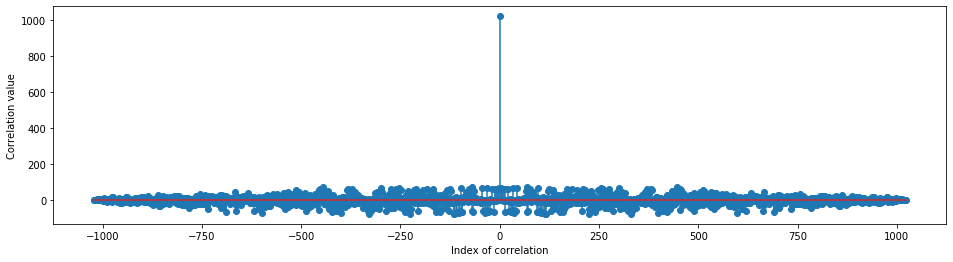

In [5]:
# Plot the auto-correlation of satellite 10 with itself. Fill in the function call.
array_10 = Gold_code_satellite(10)

(ind_10, self_10) = cross_correlation(array_10, array_10)

plt.figure(figsize=(16, 4))
plt.stem(ind_10, self_10)
plt.xlabel("Index of correlation")
plt.ylabel("Correlation value")

The autocorrelation peaks at 1023 when the signals are perfectly aligned (offset 0). The correlation of a Gold code with a shifted version of itself is not significant.

### Part (b) 
Plot the cross correlation when array1 = satellite 13 and array2 = satellite10

/home/bngo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'Correlation value')

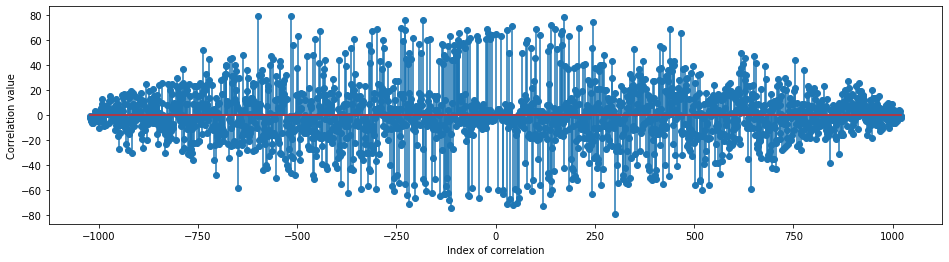

In [6]:
#Your code here
array_10 = Gold_code_satellite(10)
array_13 = Gold_code_satellite(13)

(ind_10, self_10) = cross_correlation(array_13, array_10)

plt.figure(figsize=(16, 4))
plt.stem(ind_10, self_10)
plt.xlabel("Index of correlation")
plt.ylabel("Correlation value")

We see that the cross-correlation of a Gold code of any satellite with any other satellite is very low.  This indicates that when given some unknown data, we can differentiate between different satellites.

### Part (c)

/home/bngo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'Correlation value')

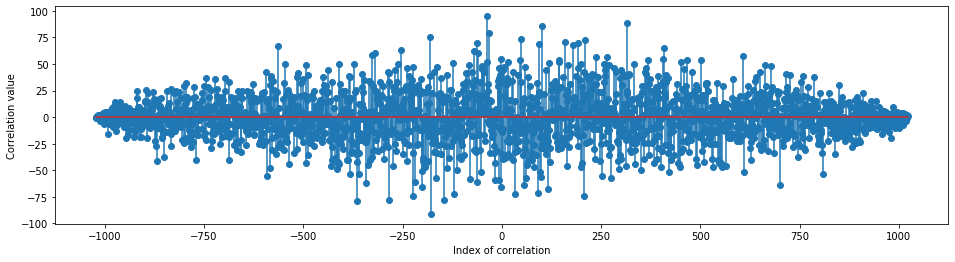

In [7]:
## THIS IS A HELPER FUNCTION FOR PART C THAT GENERATES +-1 RANDOM NOISE
def integernoise_generator(length_of_noise):
    noise_array = np.random.randint(2, size = length_of_noise)
    noise_array = 2 * noise_array - np.ones(size(noise_array))
    return noise_array

# YOUR CODE HERE

noise = integernoise_generator(1023)

(ind_10, self_10) = cross_correlation(noise, array_10)

plt.figure(figsize=(16, 4))
plt.stem(ind_10, self_10)
plt.xlabel("Index of correlation")
plt.ylabel("Correlation value")

We see that the cross-correlation of the Gold code of any satellite with integer noise is very low.  This indicates that we can still figure out the presence of a satellite even if it is buried in noise.

### Part (d)

/home/bngo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


Text(0, 0.5, 'Correlation value')

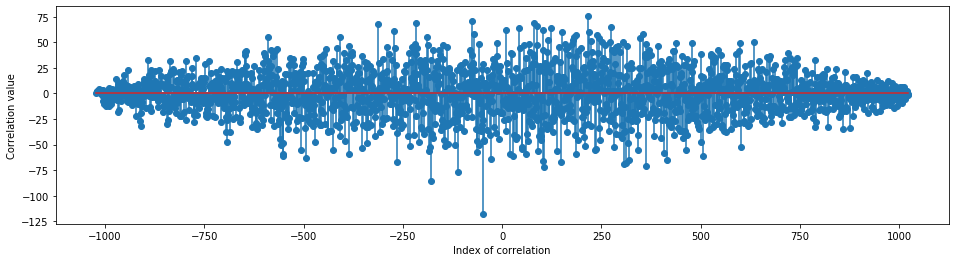

In [8]:
## THIS IS A HELPER FUNCTION FOR PART D THAT GENERATES REAL VALUED RANDOM NOISE
def gaussiannoise_generator(length_of_noise):
    noise_array = np.random.normal(0, 1, length_of_noise)
    return noise_array

# YOUR CODE HERE

gauss_noise = gaussiannoise_generator(1023)

(ind_10, self_10) = cross_correlation(gauss_noise, array_10)

plt.figure(figsize=(16, 4))
plt.stem(ind_10, self_10)
plt.xlabel("Index of correlation")
plt.ylabel("Correlation value")

We see that the Gold code of any satellite with Gaussian noise is very low.  This indicates that we can still figure out the presence of a satellite even if it is buried in Gaussian noise.

### Part (e)
Hint: you can use a absolute value threshold of 800 for the cross-correlation to detect if a given satellite is present. np.argwhere may be useful for detecting peak locations.

In [9]:
#Now let us see which signals are present in the data signal that is in data1.npy
signal1 = np.load('data1.npy')

/home/bngo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


Text(0, 0.5, 'Correlation value')

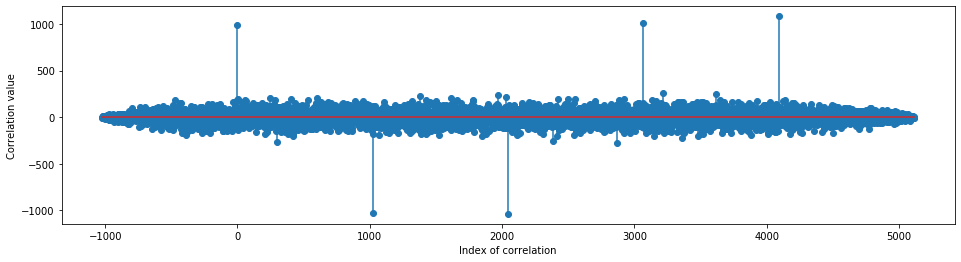

In [10]:
#Here try plotting the cross-correlations of data1.npy with a few of the satellite gold codes. 
#How can you detect if the satellite is present?

(ind_10, self_10) = cross_correlation(signal1, array_13)

plt.figure(figsize=(16, 4))
plt.stem(ind_10, self_10)
plt.xlabel("Index of correlation")
plt.ylabel("Correlation value")

In [11]:
## This helper function returns 1 if peak (greater than threshold or less than -threshold) is found, else it returns 0.
## You do not have to use this function as there are other solutions to this part as well

def find_peak(signal, threshold):
    max_value = np.amax(signal)
    min_value = np.amin(signal)
    if max_value > threshold:
        ret_value = 1
    elif min_value < -1 * threshold:
        ret_value = 1
    else:
        ret_value = 0
    return ret_value

In [12]:
## USE 'np.load' FUNCTION TO LOAD THE DATA
## USE DATA1.NPY AS THE SIGNAL ARRAY
# YOUR CODE HERE
signal1 = np.load('data1.npy')

def find_sat(signal):
    sat_list = [cross_correlation(signal, Gold_code_satellite(i)) for i in range(1, 25)]
    peaks = [j + 1 for j in range(len(sat_list)) if find_peak(sat_list[j][1], 800)]
    return peaks

find_sat(signal1)

[4, 7, 13, 19]

### Part (f)

In [13]:
## USE DATA2.NPY AS THE SIGNAL ARRAY

# YOUR CODE HERE --- first write code to figure out which satellite is present
signal2 = np.load('data2.npy')

sats = find_sat(signal2)
print(sats)

[3]


In [14]:
## Once you have figured out which satellite is present, proceed to find the data transmitted

def find_message(signal, sat_id):
    message = []
    mod_signal = cross_correlation(signal, Gold_code_satellite(sat_id))
    for i in mod_signal[1]:
        if i > 800:
            message += [1]
        elif i < -800:
            message += [-1]
    return message

print([find_message(signal2, i) for i in sats])

[[1, -1, -1, -1, 1]]


### Part (g)

In [15]:
## USE DATA3.NPY AS THE SIGNAL ARRAY

# YOUR CODE HERE
signal3 = np.load('data3.npy')

s3_sats = find_sat(signal3)
print(s3_sats, [find_message(signal3, i) for i in s3_sats])

[5, 20] [[1, 1, -1, -1, -1], [1, 1, -1, -1, -1]]


/home/bngo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':
/home/bngo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  app.launch_new_instance()


Text(0, 0.5, 'Correlation value')

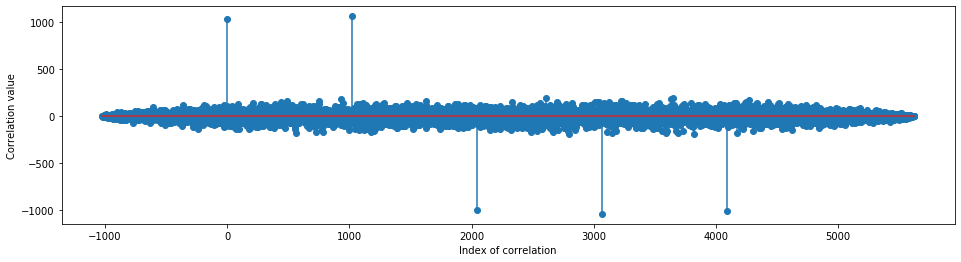

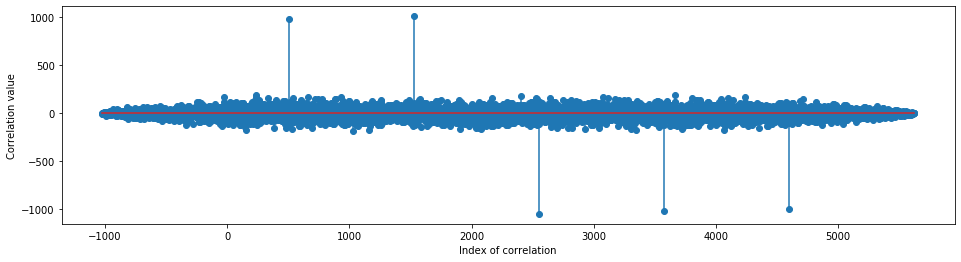

In [16]:
## We know that the data is 1, 1, -1, -1, -1, so we just find the positions of the first 1 in both the satellite correlations.
## plot the appropriate cross_correlation and find the location of the first 1
## Do this for as many satellites as there are present
## Your code here

(ind_5, self_5) = cross_correlation(signal3, Gold_code_satellite(s3_sats[0]))

plt.figure(figsize=(16, 4))
plt.stem(ind_5, self_5)
plt.xlabel("Index of correlation")
plt.ylabel("Correlation value")

(ind_20, self_20) = cross_correlation(signal3, Gold_code_satellite(s3_sats[1]))

plt.figure(figsize=(16, 4))
plt.stem(ind_20, self_20)
plt.xlabel("Index of correlation")
plt.ylabel("Correlation value")

In [17]:
def find_offset(signal, sat_id):
    corr = cross_correlation(signal, Gold_code_satellite(sat_id))
    for i in range(len(corr[1])):
        if find_peak(corr[1][i], 800):
            return corr[0][i]

print(find_offset(signal3, 5), find_offset(signal3, 20))

0 506
